Setting up

In [4]:
import numpy as np
import matplotlib.pyplot as plt

params_extinction = {
    "r1": 0.1, "k1": 10, "b1": 0.5, "beta1": 0.01,
    "r2": 0.1, "k2": 10, "b2": 0.5, "beta2": 0.01,
    "r3": 0.1, "k3": 10, "gamma1": 0.4, "gamma2": 0.4
}

params_equilibrium = {
    "r1": 0.4, "k1": 20, "b1": 0.01, "beta1": 0.005,
    "r2": 0.4, "k2": 15, "b2": 0.01, "beta2": 0.005,
    "r3": 0.9, "k3": 25, "gamma1": 0.001, "gamma2": 0.001
}

params_partial_extinction = {
    "r1": 0.2, "k1": 10, "b1": 0.9, "beta1": 0.02,
    "r2": 0.3, "k2": 20, "b2": 0.005, "beta2": 0.003,
    "r3": 0.9, "k3": 25, "gamma1": 0.001, "gamma2": 0.001
}


x0, y0, z0 = 1, 1, 20   # Initial conditions
t0, tf = 0, 60          # Start and end times
h = 0.01                # Step size
N = int((tf - t0) / h)  # Number of steps

In [5]:
def f1(t, x, y, z, params):
    return params["r1"] * x * (1 - x / params["k1"]) - params["b1"] * x * y + params["beta1"] * x * z

def f2(t, x, y, z, params):
    return params["r2"] * y * (1 - y / params["k2"]) - params["b2"] * x * y + params["beta2"] * y * z

def f3(t, x, y, z, params):
    return params["r3"] * z * (1 - z / params["k3"]) - params["gamma1"] * x * z - params["gamma2"] * y * z

def rk2_step(t, x, y, z, h, params):
    k1_x = h * f1(t, x, y, z, params)
    k1_y = h * f2(t, x, y, z, params)
    k1_z = h * f3(t, x, y, z, params)
    
    x_mid = x + k1_x / 2
    y_mid = y + k1_y / 2
    z_mid = z + k1_z / 2
    
    k2_x = h * f1(t + h/2, x_mid, y_mid, z_mid, params)
    k2_y = h * f2(t + h/2, x_mid, y_mid, z_mid, params)
    k2_z = h * f3(t + h/2, x_mid, y_mid, z_mid, params)
    
    x_next = x + k2_x
    y_next = y + k2_y
    z_next = z + k2_z
    
    return x_next, y_next, z_next



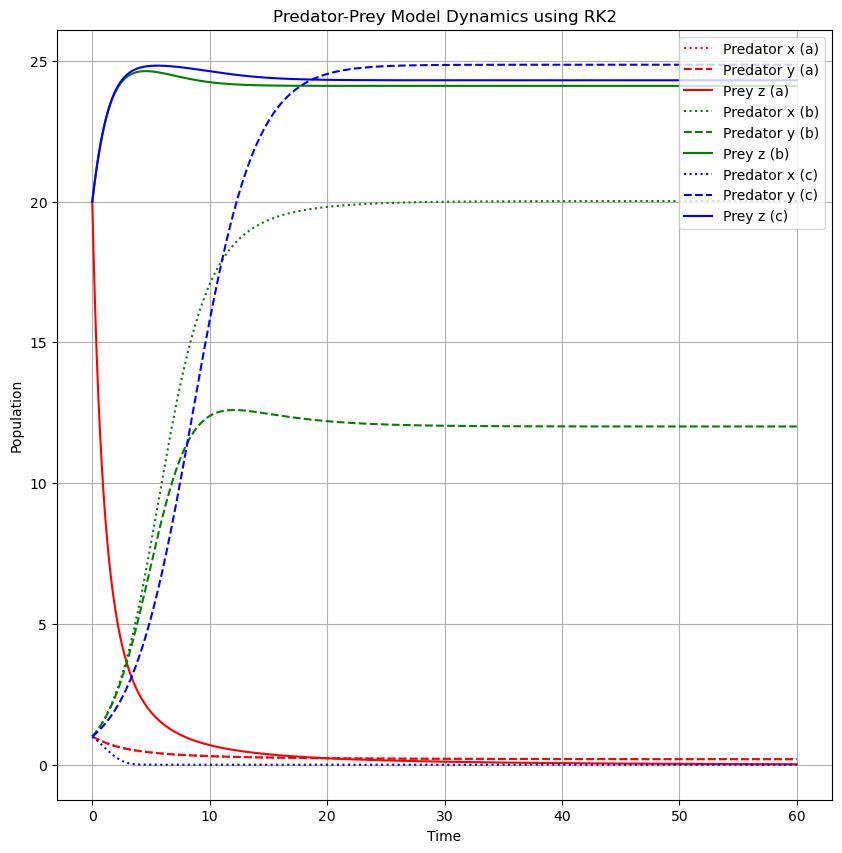

In [ ]:
plt.figure(figsize=(10,10))
for params, color, label in zip([params_extinction, params_equilibrium, params_partial_extinction], ['red', 'green', 'blue'], ['a', 'b', 'c']):
    x_values = np.zeros(N+1)
    y_values = np.zeros(N+1)
    z_values = np.zeros(N+1)
    t_values = np.linspace(t0, tf, N+1)
    
    x_values[0] = x0
    y_values[0] = y0
    z_values[0] = z0
    
    # Run the RK2 method for each time step
    for j in range(N):
        x_values[j+1], y_values[j+1], z_values[j+1] = rk2_step(t_values[j], x_values[j], y_values[j], z_values[j], h, params)
        
    plt.plot(t_values, x_values, color=color, linestyle=':', label=f'Predator x ({label})')
    plt.plot(t_values, y_values, color=color, linestyle='--', label=f'Predator y ({label})')
    plt.plot(t_values, z_values, color=color, linestyle='-', label=f'Prey z ({label})')
    # plt.show()

plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model Dynamics using RK2")
plt.legend(loc='upper right')
plt.grid()
plt.show()